In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/delhi-house-price-prediction/MagicBricks.csv')

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.shape

(1259, 11)

In [5]:
df.duplicated().sum()

83

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(1176, 11)

In [8]:
df.isna().sum()

Area             0
BHK              0
Bathroom         1
Furnishing       5
Locality         0
Parking         31
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       227
dtype: int64

The dataset has five columns with missing values - Parking, Bathroom, Furnishing, Type and Per_Sqft. Finding value for Per_Sqft is quite easy. We have to divide Price by Area to get Per_Sqft. To find the missing values in Parking, Bathroom, Furnishing and Type, I will replace the missing values with the mode of them.

In [9]:
df['Per_Sqft'].fillna((df['Price']/df['Area']),inplace=True)

In [10]:
df['Bathroom'].fillna(df['Bathroom'].mode()[0],inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0],inplace=True)
df['Parking'].fillna(df['Parking'].mode()[0],inplace=True)
df['Type'].fillna(df['Type'].mode()[0],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1176 non-null   float64
 1   BHK          1176 non-null   int64  
 2   Bathroom     1176 non-null   float64
 3   Furnishing   1176 non-null   object 
 4   Locality     1176 non-null   object 
 5   Parking      1176 non-null   float64
 6   Price        1176 non-null   int64  
 7   Status       1176 non-null   object 
 8   Transaction  1176 non-null   object 
 9   Type         1176 non-null   object 
 10  Per_Sqft     1176 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 110.2+ KB


In [12]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

Number of Parking and Bathroom cannot be float, so we can convert float to int to save memory.

In [13]:
df[['Parking','Bathroom']]=df[['Parking','Bathroom']].astype('int64')

In [14]:
df.dtypes

Area           float64
BHK              int64
Bathroom         int64
Furnishing      object
Locality        object
Parking          int64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [15]:
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

In [16]:
df['Locality'].unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

As we can see that there are so many localities, dealing with these is challenging.
I have decided to take only top 12 localities and list the remaining localities as 'other' in the dataset. It will help in analysing the locality of the house in a better way.

In [17]:
def grp_loc(locality):
    locality=locality.lower()
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhara' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    elif 'laxmi' in locality:
        return 'Laxmi Nagar'
    elif 'patel' in locality:
        return 'Patel Nagar'
    else:
        return 'Other'
df['Locality']=df['Locality'].apply(grp_loc)    

In [18]:
df['Locality'].value_counts()

Locality
Other                 626
Lajpat Nagar           85
Shahdara               75
Dwarka Sector          72
Rohini Sector          71
Laxmi Nagar            33
Vasant Kunj            33
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Patel Nagar            29
Alaknanda              29
Name: count, dtype: int64

In [19]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1176.000000,1176.000000,1176.000000,1176.000000,1.176000e+03,1176.000000
mean,1447.542711,2.789966,2.551871,1.953231,2.109173e+07,15108.514563
std,1487.658687,0.960993,1.052994,6.409197,2.523174e+07,19767.263465
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000
25%,800.000000,2.000000,2.000000,1.000000,5.800000e+06,6584.000000
50%,1172.500000,3.000000,2.000000,1.000000,1.400000e+07,11111.000000
75%,1700.000000,3.000000,3.000000,2.000000,2.600000e+07,17231.083333
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


# EDA

In [20]:
color_palette=sns.color_palette(['#797D62','#9B9B7A','#D9AE94','#E5C59E','#F1DCA7','#F8D488','#E4B074','#D08C60','#997B66'])
sns.set_palette(color_palette)

In [21]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

<Axes: xlabel='Area', ylabel='Count'>

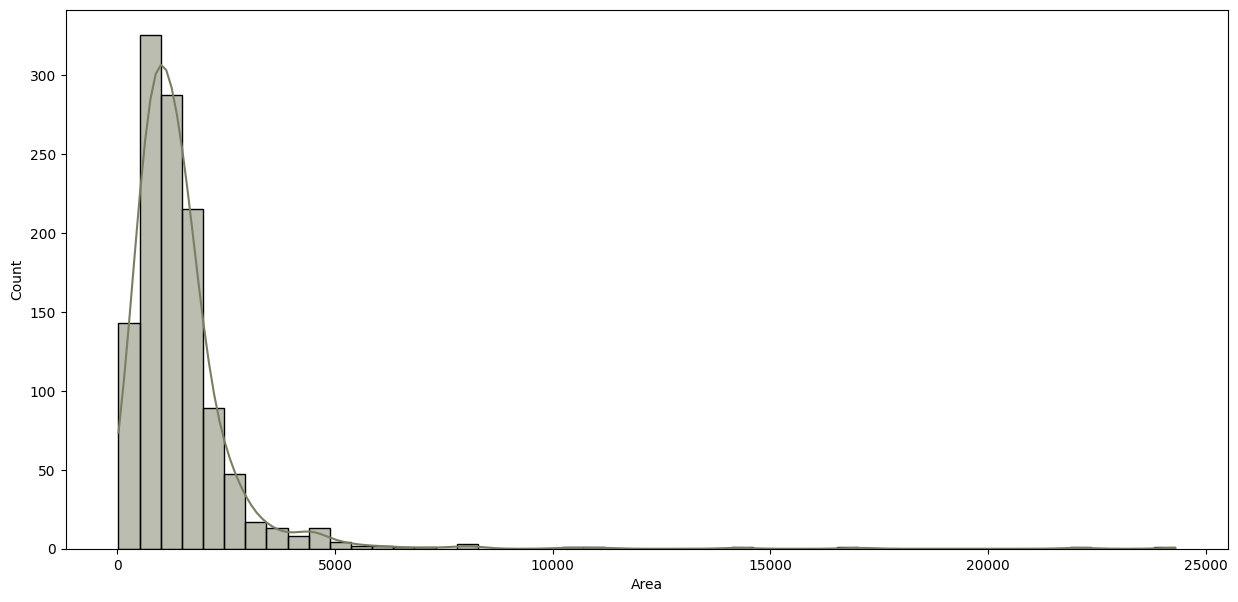

In [22]:
plt.figure(figsize=(15,7))
sns.histplot(x=df['Area'],kde=True,bins=50)

Correlation between BHK and Price is 0.5660388563585184
Skewness of the BHK is 0.5395026710389439


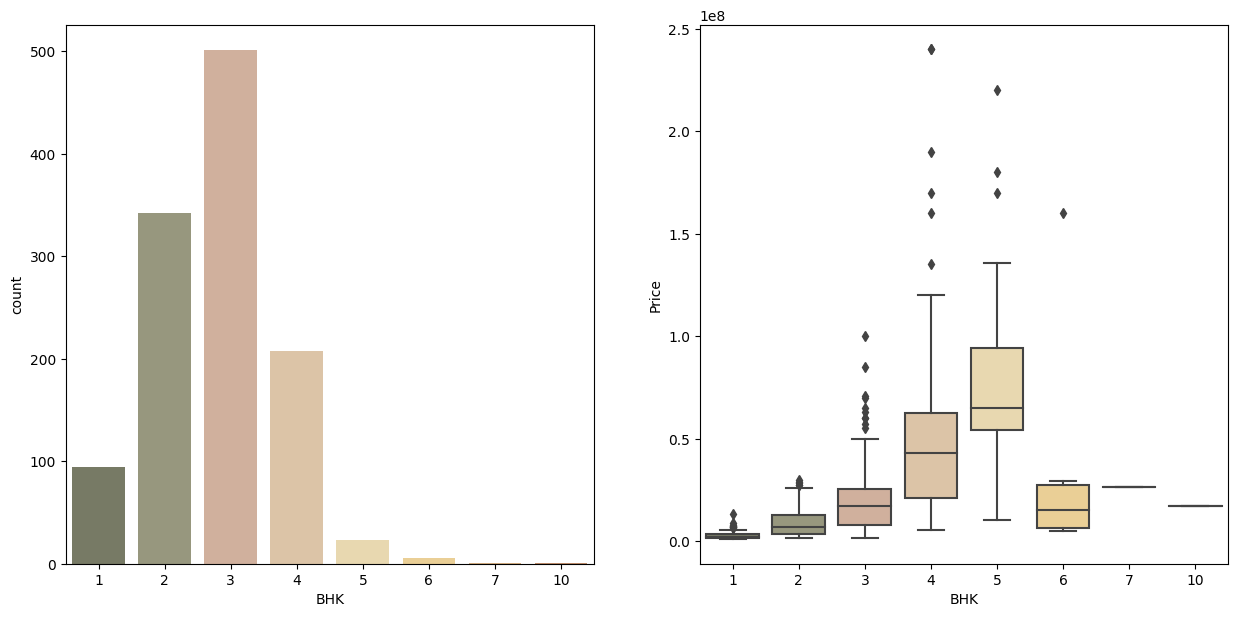

In [23]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=df['BHK'])
plt.subplot(1,2,2)
sns.boxplot(x=df['BHK'],y=df['Price'])
print('Correlation between BHK and Price is',df['BHK'].corr(df['Price']))
print('Skewness of the BHK is',df['BHK'].skew())

1. Most of the properties are having less than 5 bhk.
2. Very less properties are haing more than 5 bhk that means 2,3,4 and 5 bhk are more popular than 6,7 and 10 bhk.
3. Prices of 6,7 and 10 bhk are less than 4 or 5 bhk property, that feels strange.
#### Q. Why the prices are low for 6,7 and 10 bhk.

<Axes: xlabel='BHK', ylabel='Area'>

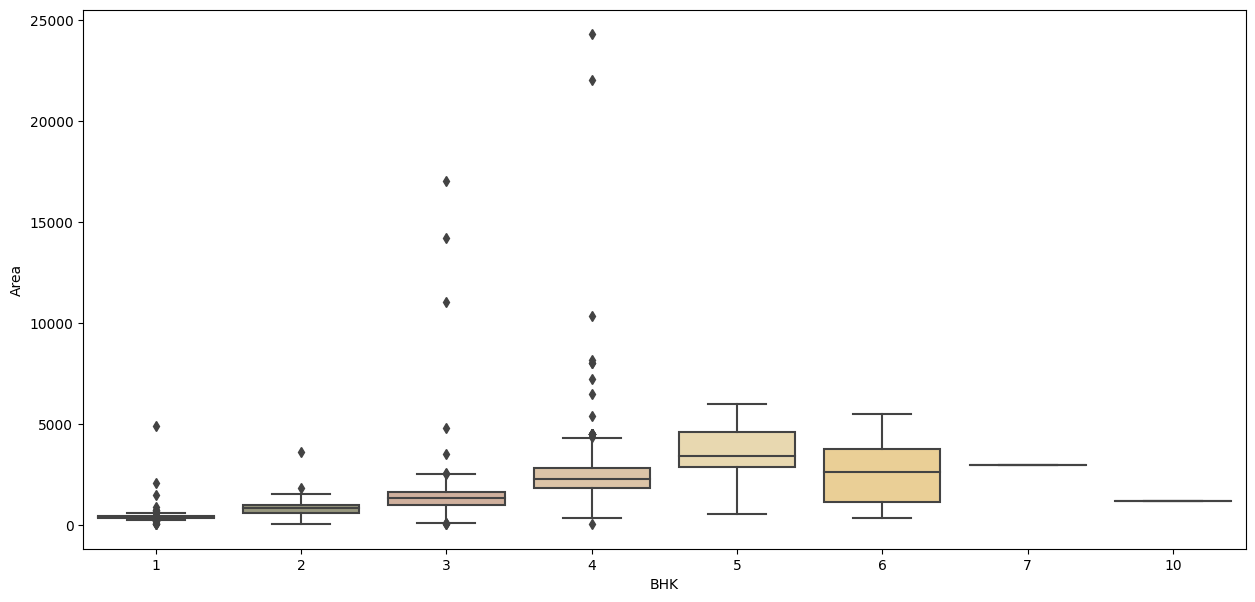

In [24]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['BHK'],y=df['Area'])

The reason for the lower prices of 6,7 and 10 bhk properties is that the area occpied by these properties are less than or equal to the properties with 3,4 and 5 bhk.
So people prefer more space in rooms than more number of rooms.
### Interesting!.

Correlation between Bathroom and Price is 0.7316835672458947
Skewness of the Bathroom is 0.8268062674140753


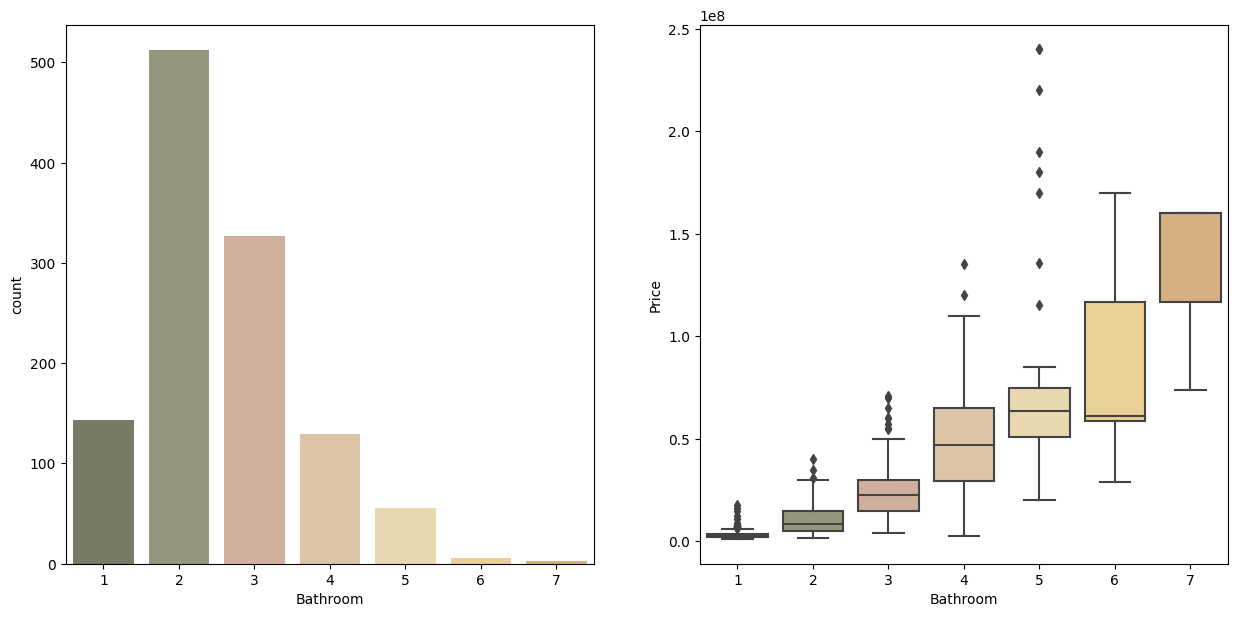

In [25]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=df['Bathroom'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Bathroom'],y=df['Price'])
print('Correlation between Bathroom and Price is',df['Bathroom'].corr(df['Price']))
print('Skewness of the Bathroom is',df['Bathroom'].skew())

More the number of bathrooms in property, more the price.

<Axes: xlabel='Furnishing', ylabel='Price'>

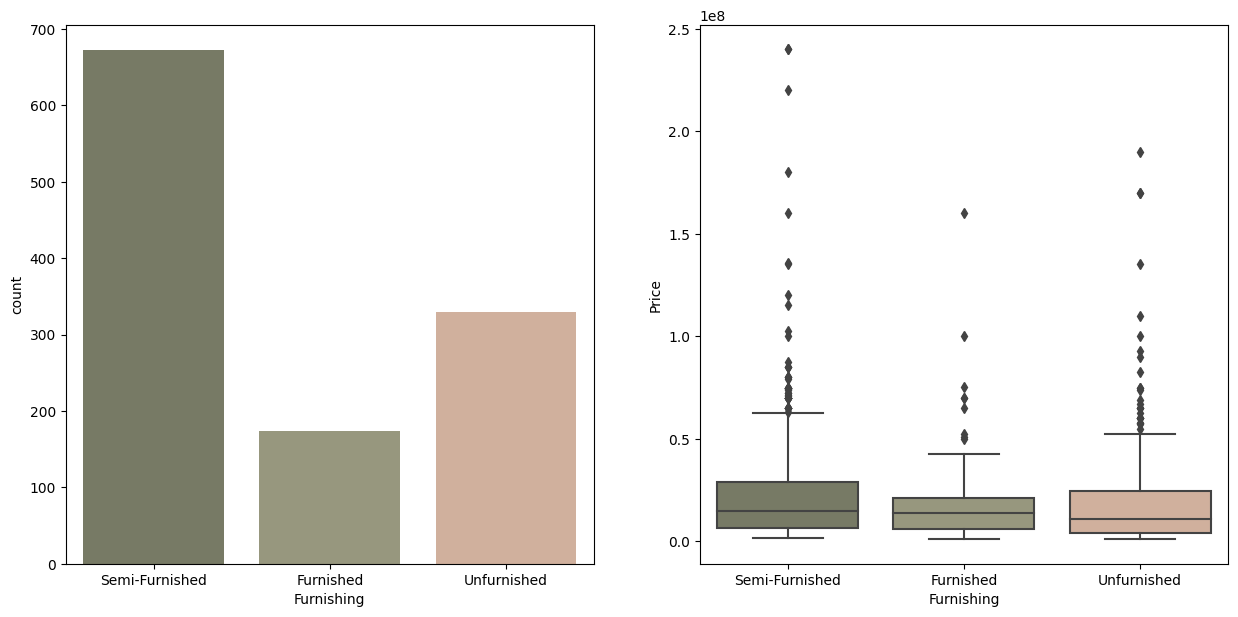

In [26]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=df['Furnishing'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Furnishing'],y=df['Price'])

### Q. Why the price for the furnished, semi-furnished and unfurnished properties are almost in same range. 

<Axes: xlabel='Furnishing', ylabel='Price'>

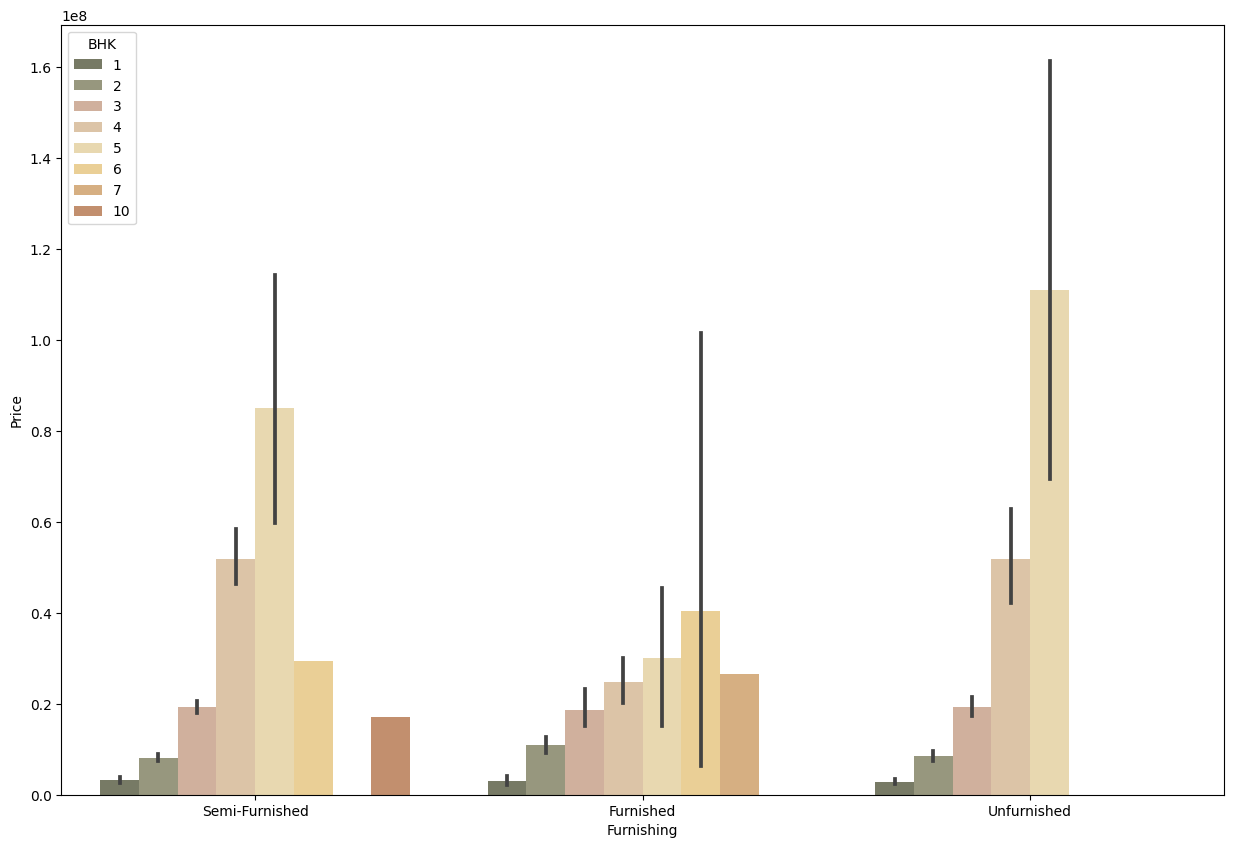

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Furnishing'],y=df['Price'],hue=df['BHK'])

Ultimately, choosing to rent out a furnished or unfurnished property really depends on the target market. Since students and young professionals tend to rent furnished properties, while couples and families prefer unfurnished units.
According to the this statement, people tend to buy unfurnished or semi-funished property because most are the customers buy property for their families to live.

Correlation between Parking and Price is -0.0012735025532615667
Skewness of the Parking is 14.819394368883357


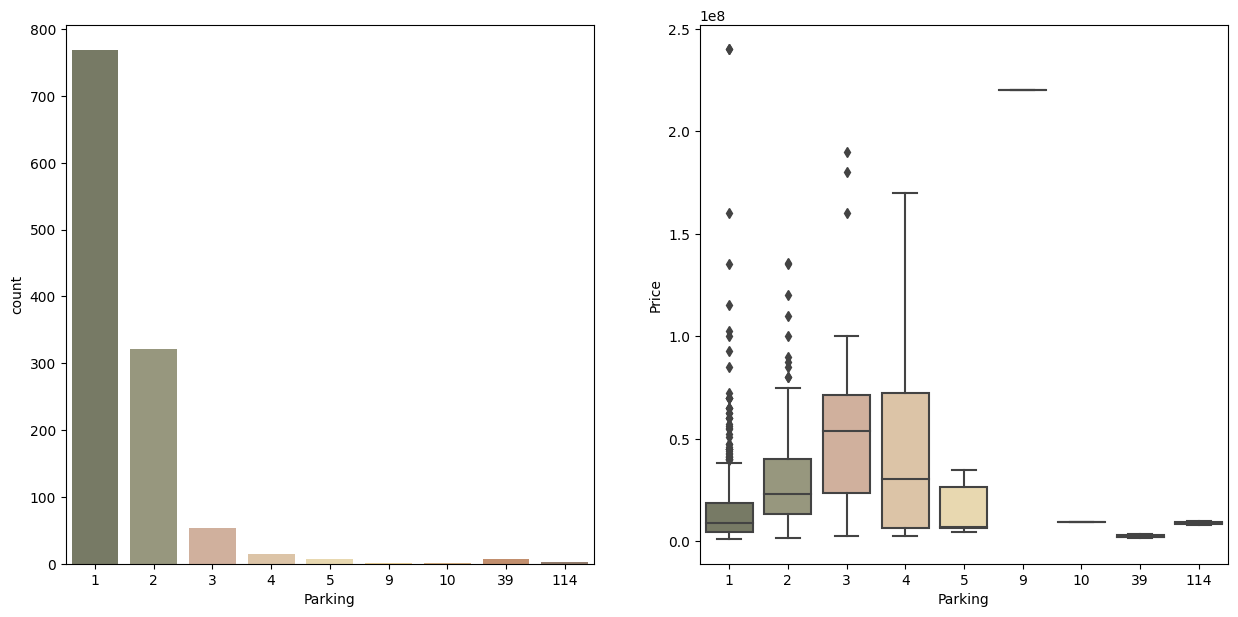

In [28]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=df['Parking'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Parking'],y=df['Price'])
print('Correlation between Parking and Price is',df['Parking'].corr(df['Price']))
print('Skewness of the Parking is',df['Parking'].skew())

1. There is some suspicion in the data as no property can have such huge number of parkings 39 or 114, there is something wrong in the data.
2. Let's remove these properties from our data.

In [29]:
df.drop(df.index[(df["Parking"] == 39)],axis=0,inplace=True)
df.drop(df.index[(df["Parking"] == 114)],axis=0,inplace=True)

<Axes: xlabel='Status', ylabel='Price'>

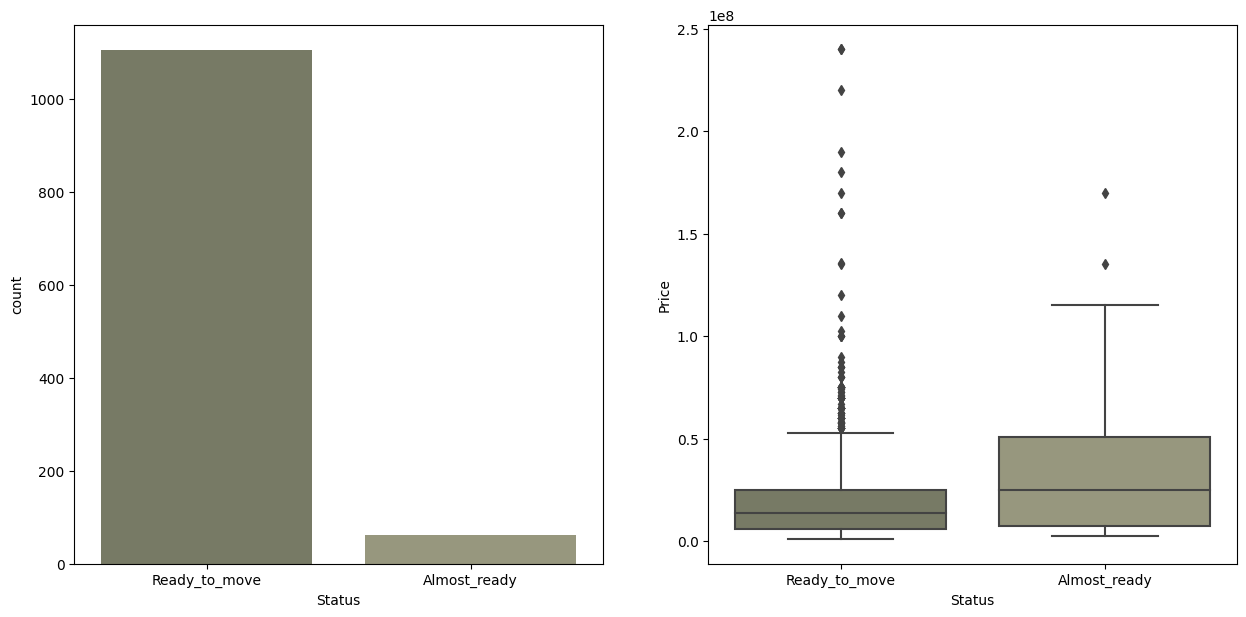

In [30]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=df['Status'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Status'],y=df['Price'])

Almost all the properties are ready to move in.

#### Q. Why the prices of the properties high which are not ready to move in yet.

In [31]:
temp=df.index[df['Status']=='Almost_ready']

In [32]:
dtemp=df.index[df['Status']=='Ready_to_move']

In [33]:
df.loc[temp].head(20)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
8,985.0,3,3,Unfurnished,Rohini Sector,1,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
67,700.0,2,1,Semi-Furnished,Dwarka Sector,1,2400000,Almost_ready,New_Property,Apartment,3524.0
131,1800.0,3,3,Semi-Furnished,Lajpat Nagar,2,35000000,Almost_ready,New_Property,Builder_Floor,18507.0
209,4688.0,5,4,Unfurnished,Patel Nagar,1,135000000,Almost_ready,New_Property,Apartment,28797.0
211,3901.0,4,4,Unfurnished,Patel Nagar,1,93000000,Almost_ready,New_Property,Apartment,23840.0
224,2900.0,5,5,Furnished,Other,1,51000000,Almost_ready,New_Property,Builder_Floor,22222.0
225,5025.0,5,6,Unfurnished,Other,4,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
226,1000.0,3,2,Semi-Furnished,Other,1,5510000,Almost_ready,New_Property,Builder_Floor,22222.0
227,1135.0,3,3,Furnished,Other,2,25000000,Almost_ready,Resale,Apartment,22222.0
228,2306.0,3,3,Unfurnished,Patel Nagar,1,57000000,Almost_ready,New_Property,Apartment,24718.0


In [34]:
df.loc[dtemp].head(20)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0000,3,2,Semi-Furnished,Rohini Sector,1,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0000,2,2,Semi-Furnished,Rohini Sector,1,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0000,2,2,Furnished,Rohini Sector,1,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0000,2,2,Semi-Furnished,Rohini Sector,1,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0000,2,2,Semi-Furnished,Rohini Sector,1,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0000,4,3,Semi-Furnished,Rohini Sector,1,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0000,4,3,Semi-Furnished,Rohini Sector,1,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0000,2,2,Semi-Furnished,Rohini Sector,1,4000000,Ready_to_move,New_Property,Apartment,6154.0
9,1300.0000,4,4,Semi-Furnished,Rohini Sector,1,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0
10,1100.0000,3,2,Semi-Furnished,Rohini Sector,1,6200000,Ready_to_move,New_Property,Builder_Floor,6154.0


There can be some possible reasons for the higher prices of properties which are not ready yet-
1. The property is newly built.
2. The area and bhk of these properties are more than 'almost ready' properties.

<Axes: xlabel='Transaction', ylabel='Price'>

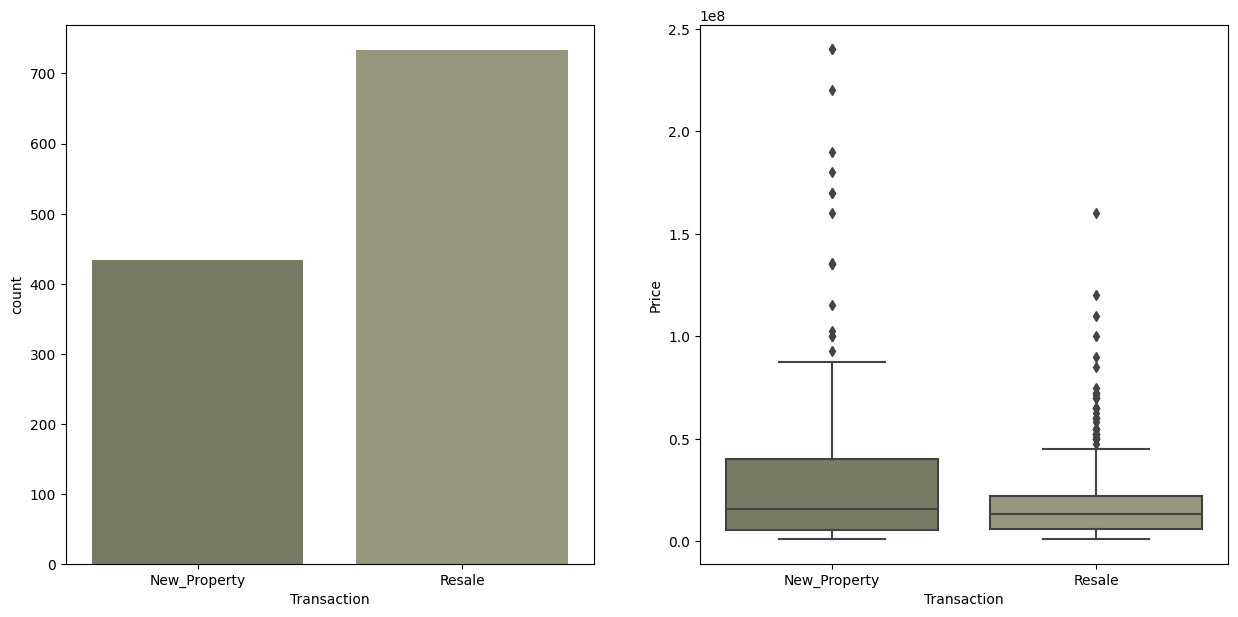

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=df['Transaction'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Transaction'],y=df['Price'])

1. As expected, the prices of newly constructed properties are more than the properties going for the resale.
2. That is the possible reason for the higher prices of almost ready properties than the properties that are ready to move in.

<Axes: xlabel='Type', ylabel='Price'>

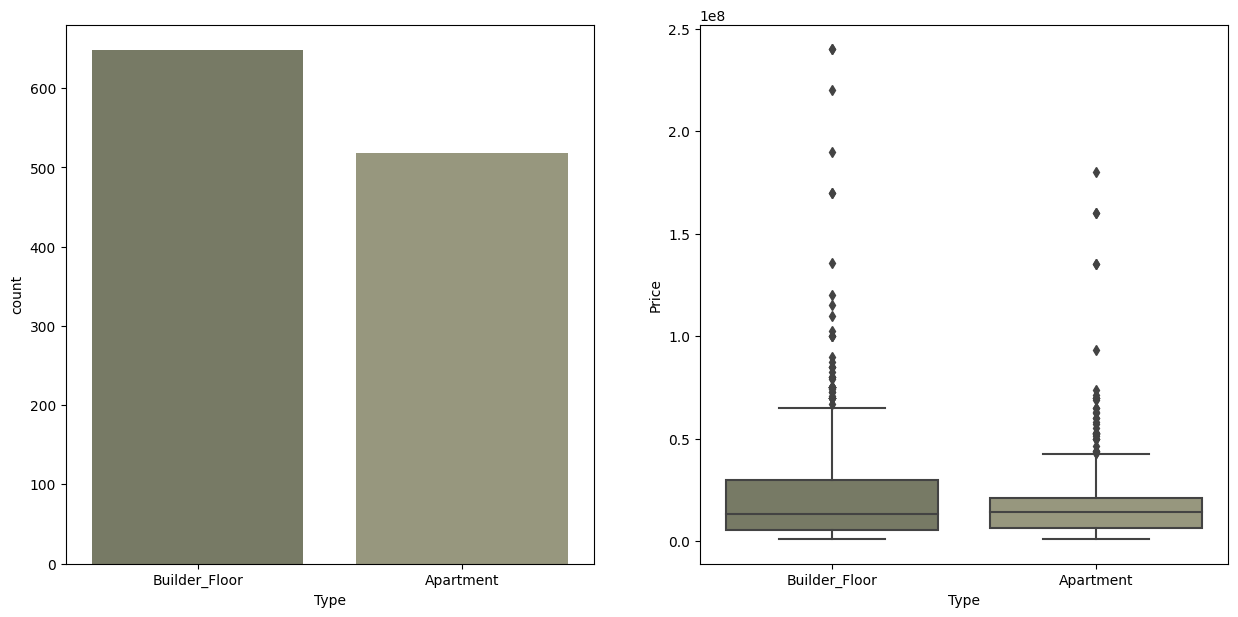

In [36]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=df['Type'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Type'],y=df['Price'])

1. There is slight difference in demand of Builder_floor than apartment.
2. The prices of Builder_floor is more than Apartment.
3. May be Builder_floor is the choice of the most people.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Laxmi Nagar'),
  Text(5, 0, 'Patel Nagar'),
  Text(6, 0, 'Vasant Kunj'),
  Text(7, 0, 'Shahdara'),
  Text(8, 0, 'Punjabi Bagh'),
  Text(9, 0, 'Paschim Vihar'),
  Text(10, 0, 'Alaknanda'),
  Text(11, 0, 'Vasundhara Enclave'),
  Text(12, 0, 'Kalkaji')])

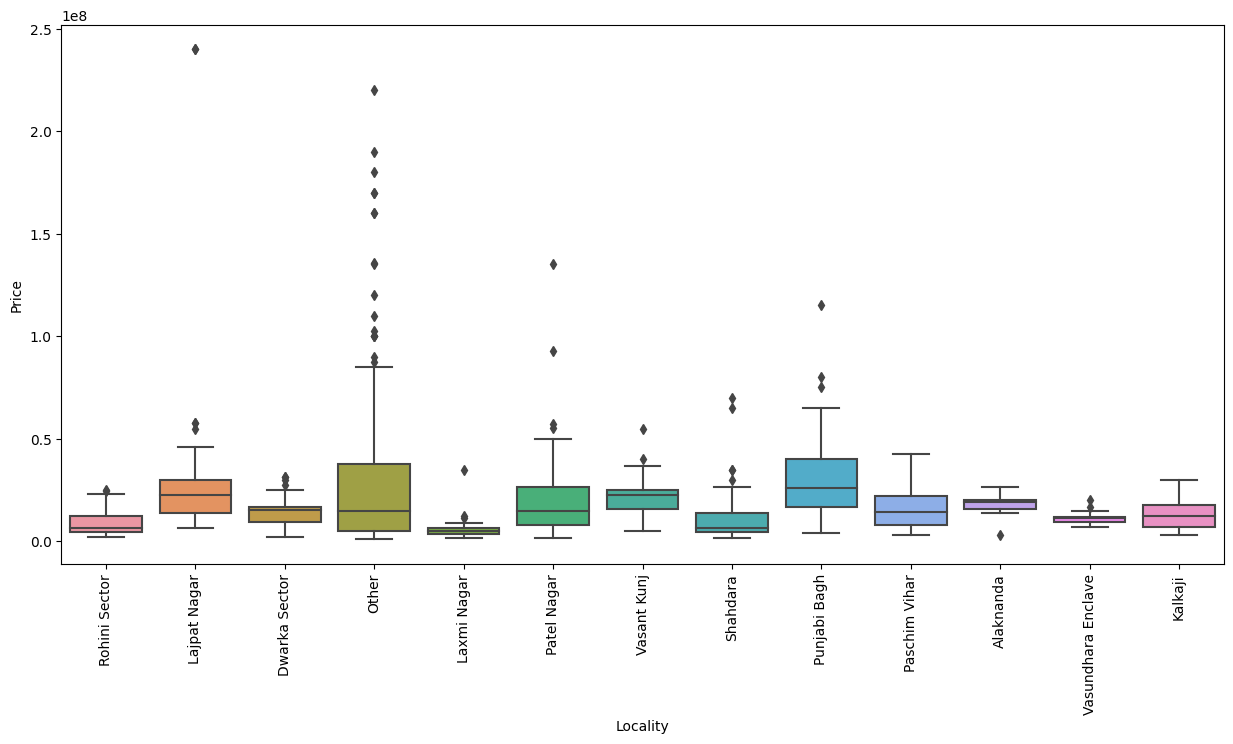

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['Locality'],y=df['Price'])
plt.xticks(rotation=90)

In [38]:
num_col=df[df.dtypes[df.dtypes != 'object'].index]
num_col

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
0,800.0,3,2,1,6500000,8125.0
1,750.0,2,2,1,5000000,6667.0
2,950.0,2,2,1,15500000,6667.0
3,600.0,2,2,1,4200000,6667.0
4,650.0,2,2,1,6200000,6667.0
...,...,...,...,...,...,...
1254,4118.0,4,5,3,55000000,12916.0
1255,1050.0,3,2,3,12500000,12916.0
1256,875.0,3,3,3,17500000,12916.0
1257,990.0,2,2,1,11500000,12916.0


<Axes: >

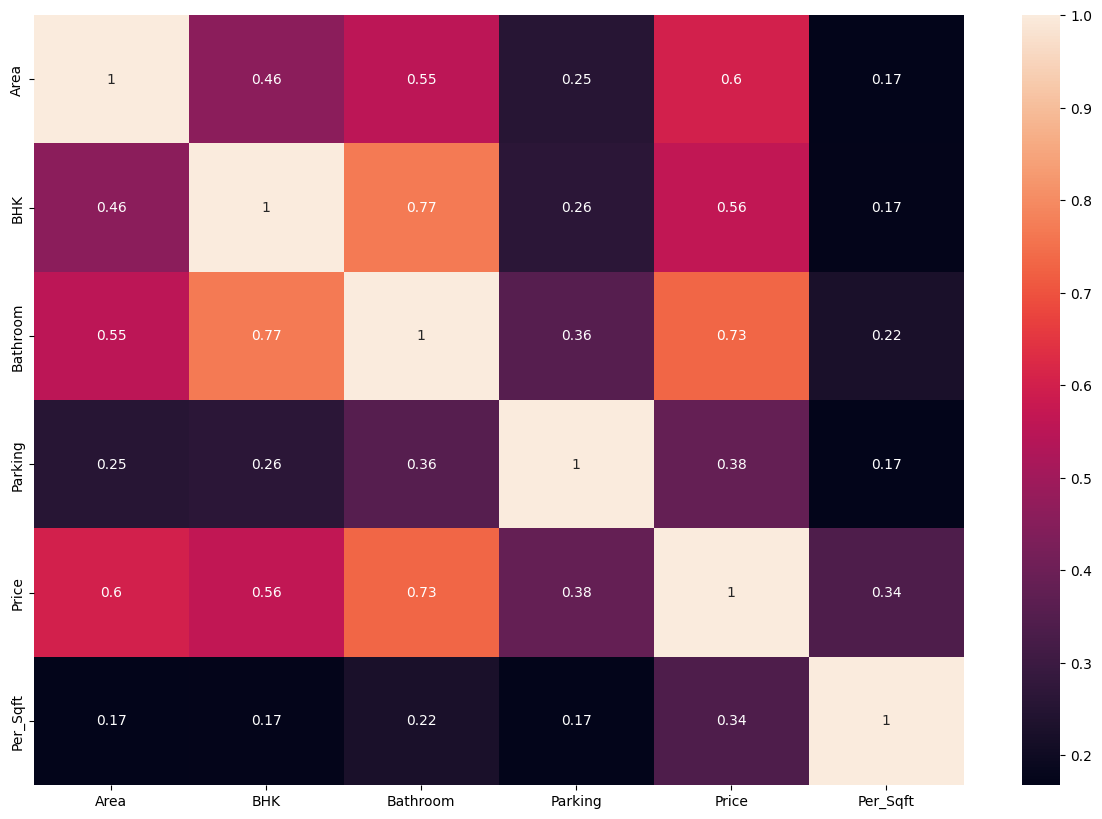

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(num_col.corr(),annot=True)

1. There is a direct correlation between BHK and Area.
2. There is a direct correlation between Bathroom Area and BHK.
3. There is a direct correlation between Price, BHK ,Bathroom and Area.
4. There is a slight correlation between Price and Parking.
5. There is a correlation between Price and Per_sqft as Per_sqft is derived from Price ans Area itself.

<Axes: xlabel='Bathroom', ylabel='Area'>

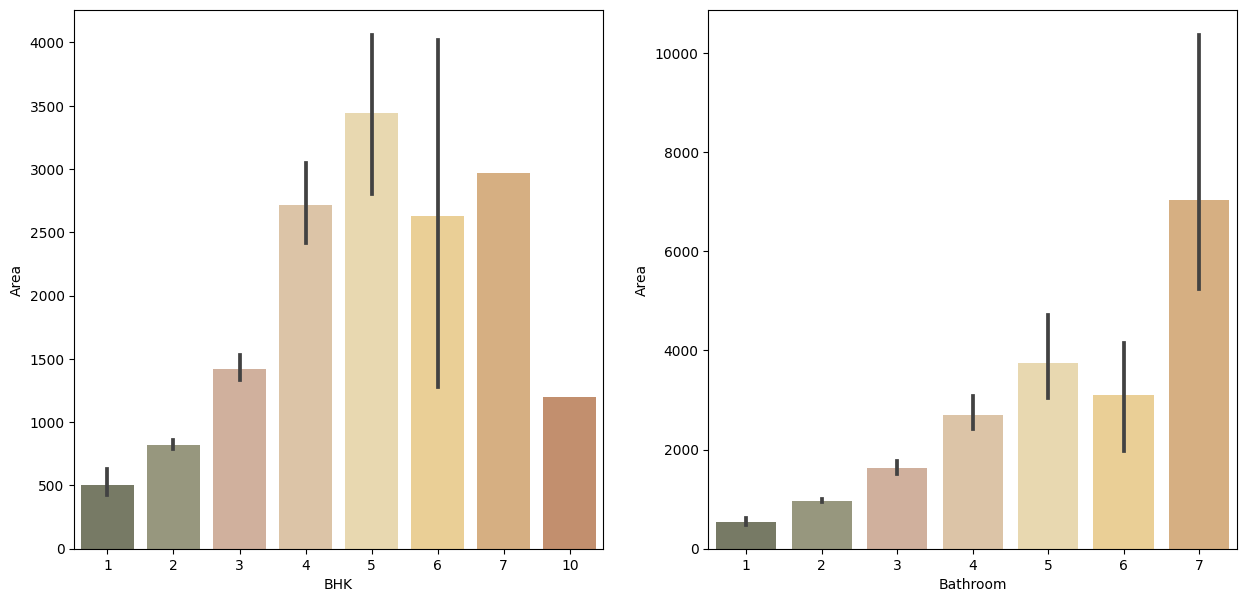

In [40]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x=df['BHK'],y=df['Area'])
plt.subplot(122)
sns.barplot(x=df['Bathroom'],y=df['Area'])

1. The area for 6,7 and 10 BHK is less than 5 BHK that explains the price difference of 5 BHK and 6,7,10 BHK properties.
2. The area is higher of the properties are higher where are more numbers of bathrooms available.

<Axes: xlabel='BHK', ylabel='Area'>

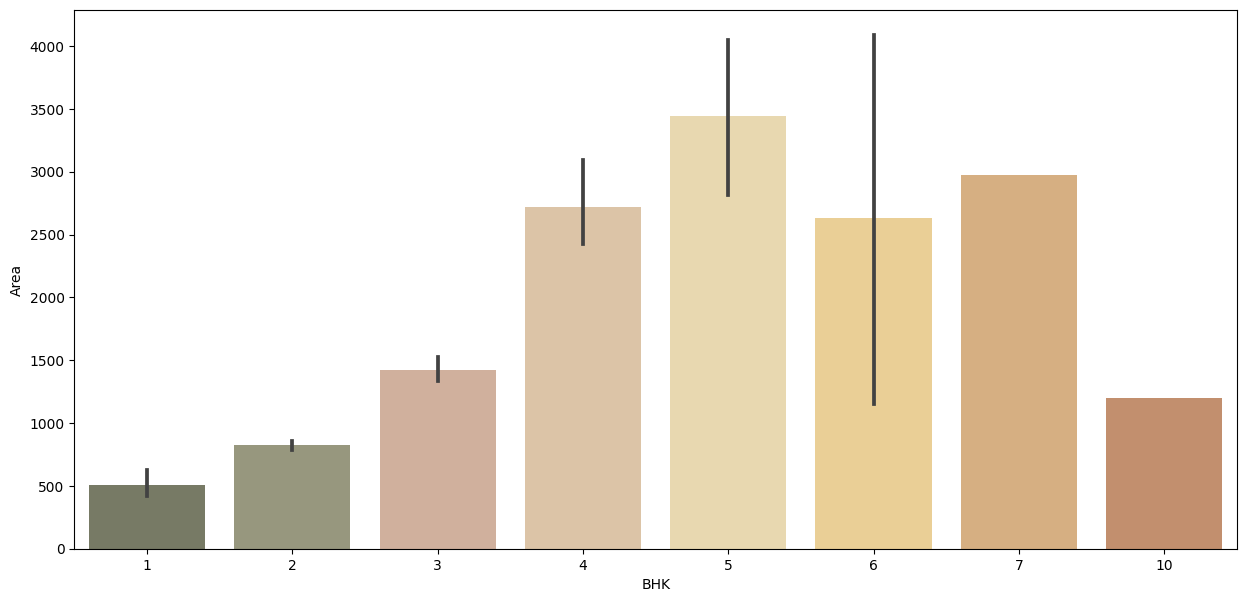

In [41]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['BHK'],y=df['Area'])

Number of bathrooms are more in 4 or 5 BHK property than 6,7 and 8 BHK property

##### Let's remove the outliers . 

In [42]:
from scipy import stats
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z < 3).all(axis=1)]

In [43]:
df.shape

(1090, 11)

## Date Preprocessing

#### Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()

In [46]:
df.dtypes

Area           float64
BHK              int64
Bathroom         int64
Furnishing      object
Locality        object
Parking          int64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [47]:
col=['Furnishing','Locality','Status','Transaction','Type']

In [48]:
for i in col:
    le.fit(df[i])
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Furnishing [1 0 2]
Locality [ 9  3  1  5  4  7 11 10  6  0 12  8  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


#### Normalizing the continuous features

In [49]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df[['Area','Price','Per_Sqft']]=min_max.fit_transform(df[['Area','Price','Per_Sqft']])

In [50]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,0.148690,3,2,1,9,1,0.059783,1,0,1,0.097173
1,0.139060,2,2,1,9,1,0.043478,1,0,0,0.076565
2,0.177581,2,2,0,9,1,0.157609,1,1,0,0.076565
3,0.110169,2,2,1,9,1,0.034783,1,1,1,0.076565
4,0.119800,2,2,1,9,1,0.056522,1,0,1,0.076565


## Train_Test_Split

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Price',axis=1),df['Price'],test_size=0.2,random_state=2)

# Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

# Hypertuning the model

In [53]:
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
           'splitter':['best', 'random'],
           'max_depth':[2,4,6,8],
           'min_samples_split':[2,4,6,8],
           'min_samples_leaf':[1,2,3,4],
           'max_features':['log2','sqrt'],
           }
from sklearn.model_selection import GridSearchCV
dt_grid_search=GridSearchCV(dtr,parameters,cv=10,scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train,y_train)
print('Best Parameters are:',dt_grid_search.best_params_)

Best Parameters are: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'splitter': 'best'}


In [54]:
dtr=DecisionTreeRegressor(criterion=dt_grid_search.best_params_.get('criterion'),
                          splitter=dt_grid_search.best_params_.get('splitter'),
                          max_depth=dt_grid_search.best_params_.get('max_depth'),
                          min_samples_split=dt_grid_search.best_params_.get('min_samples_split'),
                          min_samples_leaf=dt_grid_search.best_params_.get('min_samples_leaf'),
                          max_features=dt_grid_search.best_params_.get('min_samples_leaf'),
                          random_state=42)

In [55]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features=4, min_samples_leaf=4,
                      min_samples_split=8, random_state=42)

In [56]:
dtr.score(X_train,y_train)

0.8944834016031061

In [57]:
dtr_pred=dtr.predict(X_test)

# Evaluting Decision Tree Regressor Model

In [58]:
dft=pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':dtr_pred})
dft.reset_index(drop=True,inplace=True)
dft.head()

,Actual_Price,Predicted_Price
0,0.451087,0.445000
1,0.179348,0.120391
2,0.025000,0.046739
3,0.131522,0.166304
4,0.146739,0.114286


/tmp/ipykernel_20/3235182901.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft['Actual_Price'],color='red',label='Actual Price',hist=False)
/tmp/ipykernel_20/3235182901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft['Predicted_Price'],color='green',label='Predict

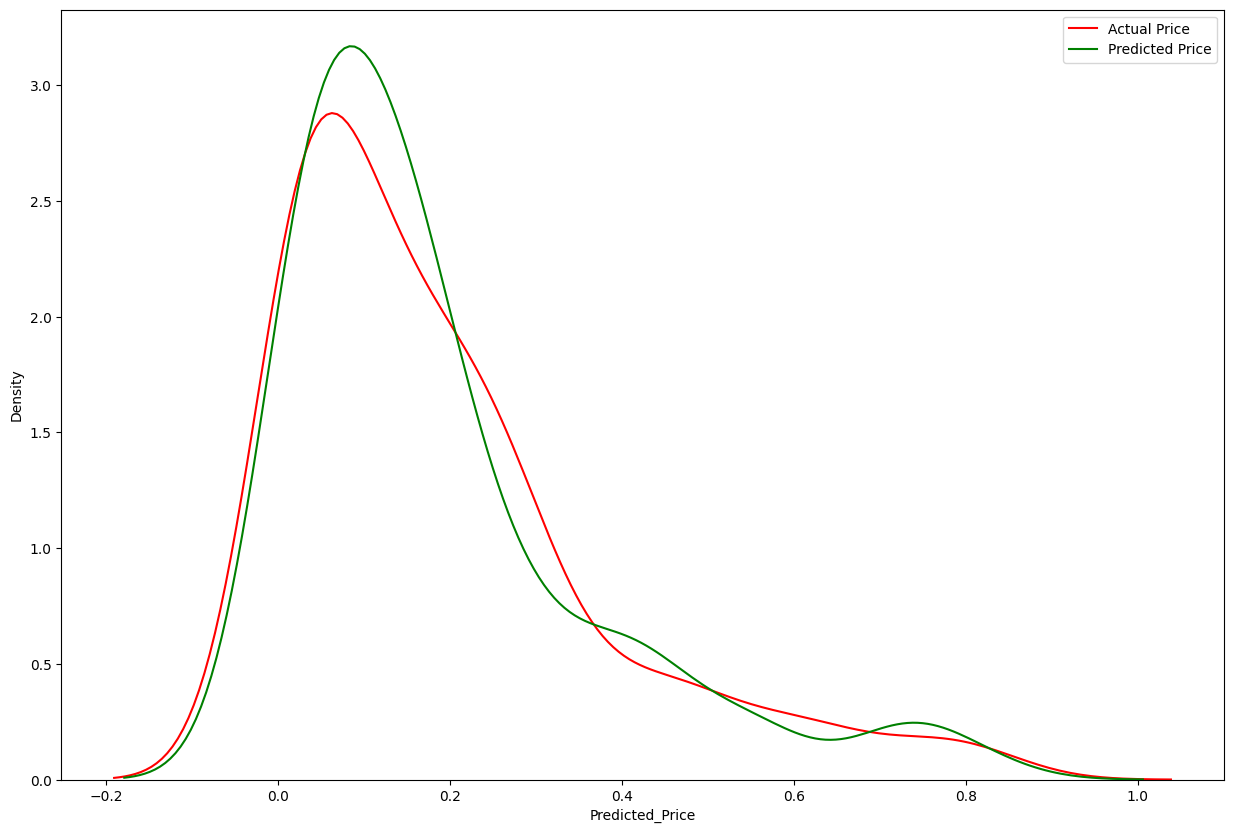

In [59]:
plt.figure(figsize=(15,10))
sns.distplot(dft['Actual_Price'],color='red',label='Actual Price',hist=False)
sns.distplot(dft['Predicted_Price'],color='green',label='Predicted Price',hist=False)
plt.legend()

In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2_Score:',r2_score(y_test,dtr_pred))
print('Mean_Squared_Error:',mean_squared_error(y_test,dtr_pred))
print('Mean_absolute_error:',mean_absolute_error(y_test,dtr_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, dtr_pred)))

R2_Score: 0.7837149419032884
Mean_Squared_Error: 0.007517207357987899
Mean_absolute_error: 0.05220245964167678
Root Mean Squared Error:  0.08670183018822554


# Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rfr=RandomForestRegressor()

In [63]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
rfr.score(X_train,y_train)

0.978075958025117

In [65]:
r_pred=rfr.predict(X_test)

# Evaluating Random Forest

In [66]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':r_pred})
dfr.reset_index(drop=True,inplace=True)
dfr.head()

,Actual,Predicted
0,0.451087,0.510130
1,0.179348,0.120583
2,0.025000,0.041905
3,0.131522,0.164287
4,0.146739,0.111957


/tmp/ipykernel_20/376180408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dfr['Actual'],color='red',hist=False,label='Actual_Price')
/tmp/ipykernel_20/376180408.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dfr['Predicted'],color='green',hist=False,label='Predic

<Axes: ylabel='Density'>

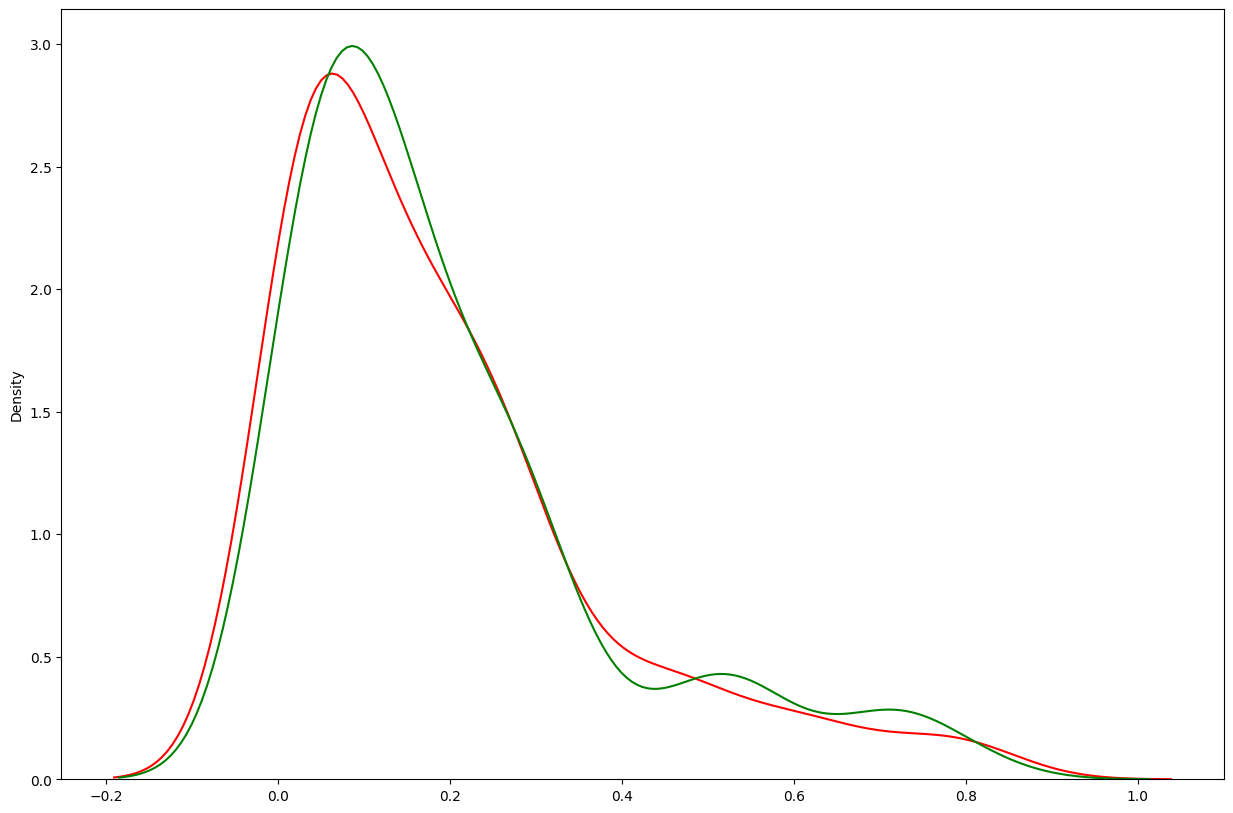

In [67]:
plt.figure(figsize=(15,10))
sns.distplot(x=dfr['Actual'],color='red',hist=False,label='Actual_Price')
sns.distplot(x=dfr['Predicted'],color='green',hist=False,label='Predicted_Price')

In [68]:
print('R2_Score:',r2_score(y_test,r_pred))
print('Mean_Squared_Error:',mean_squared_error(y_test,r_pred))
print('Mean_absolute_error:',mean_absolute_error(y_test,r_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, r_pred)))

R2_Score: 0.8574443857637084
Mean_Squared_Error: 0.004954665484937762
Mean_absolute_error: 0.042826901342906516
Root Mean Squared Error:  0.0703893847461232
